**Grupo 1:**
<br>Juana Mejía 
<br>Daniela Espinosa
<br>Pablo Ortega

## Inteligencia de negocios
### Laboratorio 1 - Regresión Lineal

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('202420_Laboratorio 1 - Regresión_train_data.csv')

In [3]:
df.shape

(1000, 23)

### Descripción General de los Datos
Este conjunto de datos médicos contiene información sobre 1000 pacientes con 23 características tanto clínicas como demográficas, con el fin de estimar el tiempo aproximado de hospitalización de un paciente. A continuación, se describen las características de las variables, el perfil de los datos y el análisis de calidad de datos.

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
0,2,2,49,2,1,ant. chest pain,1,1,2,150.0,90.0,92.0,20.0,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
1,2,2,30,4,1,headache,1,1,4,140.0,80.0,76.0,20.0,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,2,1,61,3,2,ant. chest pain,1,1,3,100.0,60.0,84.0,20.0,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
3,2,2,61,3,1,headache,1,1,4,120.0,70.0,76.0,20.0,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
4,1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,70.0,130.0,20.0,38.1,NaN,4,Fever,1,2,1,267,"3,60",2


### Estadísticas descriptivas

In [5]:
pd.set_option('display.max_columns', None)
df.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


#### Niveles de variables categóricas

In [6]:
categoricas=['Grupo','Sexo','Modo_Llegada',"Lesion",'Queja_Principal','Estado_Mental','Dolor','dolor_NRS','KTAS_enfermera','Diagnostico_En_Urgencias','Disposicion','KTAS_experto','Grupo_De_Error','Error_Triaje']
data_categorica=df[categoricas]

levels = data_categorica.apply(pd.Series.unique)
num_levels = data_categorica.apply(pd.Series.nunique)

print(levels)
print(num_levels)

Grupo                                                                  [2, 1]
Sexo                                                                   [2, 1]
Modo_Llegada                                            [2, 4, 3, 1, 6, 5, 7]
Lesion                                                                 [1, 2]
Queja_Principal             [ant. chest pain, headache, fever & chill, dys...
Estado_Mental                                                    [1, 4, 2, 3]
Dolor                                                                  [1, 0]
dolor_NRS                              [2, 4, 3, #BOÞ!, 6, 5, 7, 8, 1, 9, 10]
KTAS_enfermera                                                [2, 3, 4, 1, 5]
Diagnostico_En_Urgencias    [Ischaemic chest pain, Subarachnoid haemorrhag...
Disposicion                                             [2, 7, 1, 5, 6, 3, 4]
KTAS_experto                                                  [2, 3, 4, 1, 5]
Grupo_De_Error                                 [0, 4, 1, 2, 6, 7

In [7]:
df['dolor_NRS'].value_counts()

dolor_NRS
#BOÞ!    440
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
9          1
Name: count, dtype: int64

In [8]:

d_dolor = df[df['Dolor']==1]

d_dolor['dolor_NRS'].value_counts()

dolor_NRS
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
#BOÞ!      2
9          1
Name: count, dtype: int64

In [9]:
d_murte = df[df['Disposicion']==7]

d_dolor['dolor_NRS'].value_counts()
df['dolor_NRS'] = df['dolor_NRS'].replace('#BOÞ!', 0)

In [10]:
df['Modo_Llegada'].value_counts()

Modo_Llegada
3    588
2    220
4    122
1     60
6      7
5      2
7      1
Name: count, dtype: int64

In [11]:
#Número de faltantes por columna
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Grupo                         0
Sexo                          0
Edad                          0
Modo_Llegada                  0
Lesion                        0
Queja_Principal               0
Estado_Mental                 0
Dolor                         0
dolor_NRS                     0
SBP                          17
DBP                          21
HR                           12
RR                           15
BT                           11
Saturacion                  556
KTAS_enfermera                0
Diagnostico_En_Urgencias      1
Disposicion                   0
KTAS_experto                  0
Grupo_De_Error                0
Duracion_Estancia_Min         0
Duracion_KTAS_Min             0
Error_Triaje                  0
dtype: int64


### Resumen de las Variables

| Variable                  | Tipo                                     | Valores                 | Media     | Desviación Estándar | Rango                   | Número de Datos |
|---------------------------|------------------------------------------|-------------------------|-----------|---------------------|-------------------------|-----------------|
| Grupo                     | Categórica (1 o 2)                       | 1, 2                    | 1.45      | 0.50                | 1 a 2                   | 1000            |
| Sexo                      | Categórica (1=Hombre, 2=Mujer)           | 1, 2                    | 1.51      | 0.50                | 1 a 2                   | 1000            |
| Edad                      | Continua                                 | -                       | 53.89     | 19.83               | 16 a 94 años            | 1000            |
| Modo_Llegada              | Categórica con 7 niveles                 | 1 a 7                   | 2.81      | 0.80                | 1 a 7                   | 1000            |
| Lesion                    | Categórica binaria (1=Sí, 2=No)          | 1, 2                    | 1.20      | 0.40                | 1 a 2                   | 1000            |
| Queja_Principal           | Categórica (descripción textual)         | Variados*                | -         | -                   | -                       | 1000            |
| Estado_Mental             | Categórica ordinal (1 a 4)               | 1 a 4                   | 1.10      | 0.43                | 1 a 4                   | 1000            |
| Dolor                     | Categórica binaria (0=No, 1=Sí)          | 0, 1                    | 0.56      | 0.50                | 0 a 1                   | 1000            |
| dolor_NRS                 | Categórica ordinal (0 a 10)              | 1 a 10                  | 1.10      | 1.68                | 1 a 10                  | 1000            |
| SBP (Presión Sistólica)   | Continua                                 | -                       | 133.49    | 27.16               | 50 a 275 mmHg           | 983             |
| DBP (Presión Diastólica)  | Continua                                 | -                       | 79.57     | 15.17               | 31 a 160 mmHg           | 979             |
| HR (Frecuencia Cardíaca)  | Continua                                 | -                       | 84.40     | 16.30               | 32 a 148 lpm            | 988             |
| RR (Frecuencia Respiratoria) | Continua                             | -                       | 19.45     | 2.07                | 14 a 30 rpm             | 985             |
| BT (Temperatura Corporal) | Continua                                 | -                       | 36.56°C   | 0.52                | 35 a 39.8°C             | 989             |
| Saturacion                | Continua                                 | -                       | 97.05%    | 1.41                | 95 a 100%               | 444             |
| KTAS_enfermera            | Categórica ordinal (1 a 5)               | 1 a 5                   | 3.33      | 0.86                | 1 a 5                   | 1000            |
| Diagnostico_En_Urgencias  | Categórica (descripción textual)         | Variados*               | -         | -                   | -                       | 1000            |
| Disposicion               | Categórica con 7 niveles                 | 1 a 7                   | 3.33      | 1.16                | 1 a 7                   | 1000            |
| KTAS_experto              | Categórica ordinal (1 a 5)               | 1 a 5                   | 3.26      | 0.87                | 1 a 5                   | 1000            |
| Grupo_De_Error            | Categórica ordinal (0 a 9)               | 0 a 9                   | 0.57      | 1.59                | 0 a 9                   | 1000            |
| Duracion_Estancia_Min     | Continua                                 | -                       | 12792.48  | 87721.15            | 0 a 709510 minutos      | 1000            |
| Duracion_KTAS_Min         | String                                 | -                       | 2.00      | 1.20                | 1 a 7 minutos           | 1000            |
| Error_Triaje              | Categórica          | 0 a 2                    | 0.25      | 0.63                | 0 a 2                   | 1000            |

*Las variables Queja_Principal y Diagnostico_En_Urgencia tienen 347 y 489 categorías respectivamente


### Limpieza de datos

In [12]:
data = df.copy()

In [13]:
# Conversión de String a float 
data['Duracion_KTAS_Min'] = data['Duracion_KTAS_Min'].str.replace(',', '.').astype(float)

In [14]:
# Se quitan las columnas por la cantidad tan alta de categorías
data=data.drop(columns=['Queja_Principal','Diagnostico_En_Urgencias','Saturacion'])

In [15]:
columnas_imputar = ['SBP', 'DBP', 'HR', 'RR', 'BT']

# Imputar valores NaN con la media de cada columna
for columna in columnas_imputar:
    data[columna].fillna(data[columna].mean(), inplace=True)

C:\Users\danie\AppData\Local\Temp\ipykernel_17068\3883247172.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[columna].fillna(data[columna].mean(), inplace=True)


In [16]:
# Revisar:
# Modo_Llegada
# Dolor
# Dolor NRS

### Análisis de Calidad de Datos

##### Valores Faltantes
- **Saturacion**, **BT (Temperatura Corporal)**, **dolor_NRS**, **SBP**, **DBP**, **HR**, **RR**: Tienen valores faltantes.

##### Distribución de Datos
- **Duracion_Estancia_Min**: Muestra alta variabilidad, con algunos valores extremadamente altos que podrían ser atípicos.
- **BT (Temperatura Corporal)**: Tiene poca variabilidad y valores muy concentrados.

##### Valores Atípicos
- **Duracion_Estancia_Min**: Presenta valores extremos que pueden ser errores o casos excepcionales.
- **SBP (Presión Sistólica)** y **HR (Frecuencia Cardíaca)**: Muestran algunas discrepancias que deben ser evaluadas.

##### Consistencia de Datos
- **dolor_NRS**: Muestra un rango amplio (0 a 10) pero con una media baja, lo cual es consistente con el reporte de dolor.


### Preselección de Variables para el Modelado

Para estimar la **Duracion_Estancia_Min**, las siguientes variables son importantes:

- **Edad**: Influye en la duración de la hospitalización.
- **Estado_Mental**: Relacionado con la condición clínica.
- **SBP (Presión Sistólica)**, **DBP (Presión Diastólica)**, **HR (Frecuencia Cardíaca)**: Indicadores clave de la condición física.
- **KTAS_experto**: Evaluación de la urgencia por un experto.
- **Saturacion**: Estado de oxigenación.
- **Grupo**: Puede reflejar diferencias en el tratamiento.
- **Grupo_De_Error**: Posible influencia en la duración de la estancia.
- **Duracion_KTAS_Min**: Tiempo hasta la clasificación, que puede correlacionarse con la duración total.


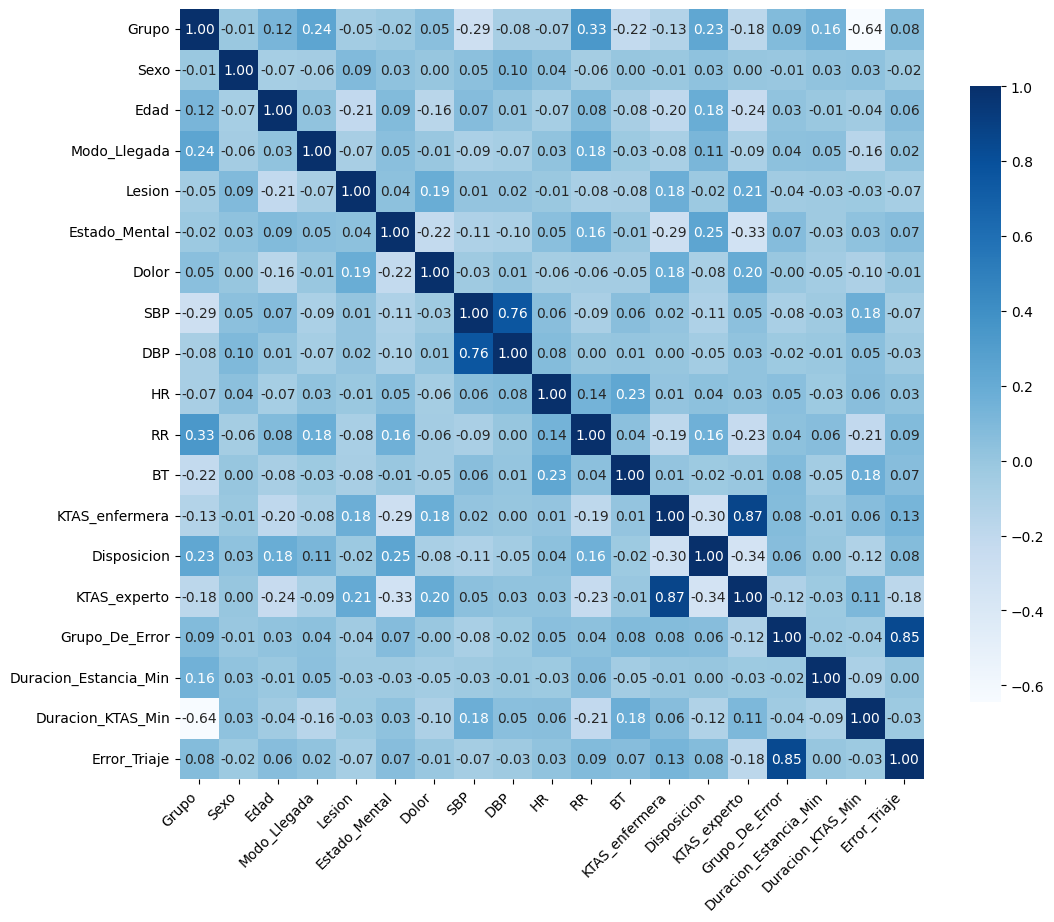

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'KTAS_enfermera',
       'Disposicion', 'KTAS_experto', 'Grupo_De_Error',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje'],
      dtype='object')


In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr(numeric_only= True)

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sb.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt=".2f", 
           cbar_kws={"shrink": 0.8})

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.show()

print(data.columns)


En la matriz de correlación es posible identificar variables correlacionadas que podrían ser eliminadas ya que una explica a la otra. Las principales son:
- SBP con DBP
- KTAS_enfermera con KTAS_experto
- Grupo_De_Error con Error_Triaje

<Axes: >

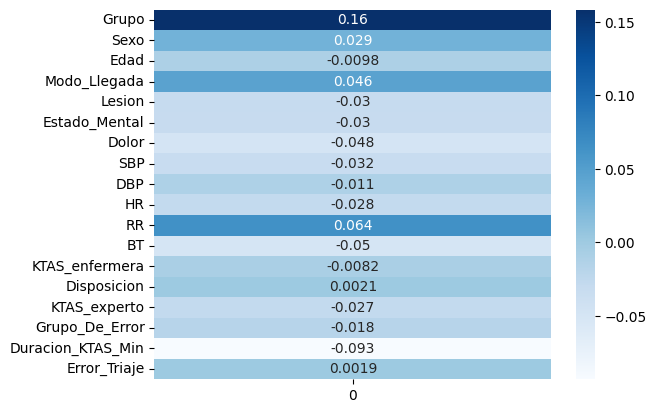

In [18]:
corrw = data.drop(['Duracion_Estancia_Min'], axis=1).corrwith(data['Duracion_Estancia_Min'], numeric_only= True)
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

Según lo observado en la matriz de correlación con la variable objetivo decidimos eliminar las columnas DBP, KTAS_enfermera y Error_Triaje, ya que tienen una menor correlación con la Duracion_Estancia_Min que SBP, KTAS_experto y Grupo_De_Error respectivamente.

In [19]:
data=data.drop(columns=['DBP', 'KTAS_enfermera', 'Error_Triaje'])

In [20]:
excluded_columns=['Duracion_Estancia_Min']
X=data.loc[:, ~data.columns.isin(excluded_columns)]
Y=data.loc[:, data.columns == 'Duracion_Estancia_Min']


Information Gain

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


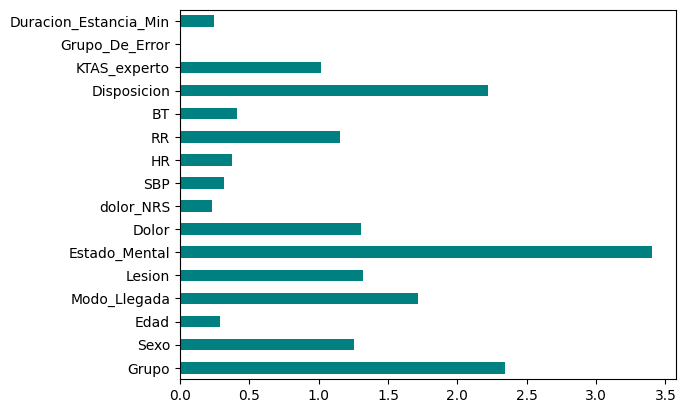

In [24]:
from sklearn.feature_selection import mutual_info_classif


importances = mutual_info_classif(X, Y)

# Assuming 'dataframe' is the DataFrame containing your features
feat_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])

feat_importances.plot(kind='barh', color='teal')
plt.show()



### Implementación de modelos

#### Modelo Lineal

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear el modelo y entrenarlo
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Calcular el MSE para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Imprimir los coeficientes, intercepto y MSE
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"MSE para el conjunto de prueba: {mse_test:.4f}")




Coeficientes: [[ 28216.3429865    9765.993123     -211.42852658   1648.06996103
   -7306.2919606   -3818.66743777 -13340.53747411    343.14294792
      63.19561419   -376.11802784    163.94660529  -2198.60827123
   -1221.63568778   1307.5014677   -2085.94088281    364.16042587]]
Intercepto: [79578.85010926]
MSE para el conjunto de prueba: 11854888847.7134


Ya medimos el desempeño del modelo con el MSE del set de prueba y el modelo no promete mucho. Ahora lo mediremos con el set de entrenamiento usando LOOCV.

##### Cross validation 

In [23]:
from sklearn.model_selection import LeaveOneOut
import numpy as np

loo = LeaveOneOut()
mse_list = []

for train_index, test_index in loo.split(X):
    # Dividir los datos según LOOCV
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = Y.iloc[train_index], Y.iloc[test_index]
    
    
    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)

    y_pred_cv = model.predict(X_test_cv)
    
    # MSE
    mse = mean_squared_error(y_test_cv, y_pred_cv)
    mse_list.append(mse)

# Calcular el MSE promedio
print(mse_list)
mean_mse = np.mean(mse_list)
print(f"Media del MSE por LOOCV: {mean_mse:.4f}")


[685977223.8201355, 591714209.6992433, 305555472.2877512, 549078851.684419, 978.3174195685905, 203569798.514321, 101636608.12086011, 72614399.59069194, 482723017.13755697, 986859188.5506608, 26854942.20873856, 70287.68752847407, 1297391935.5961356, 24647030.649260983, 782867424.1108985, 705142444.4399707, 3258963.5682494524, 947383024.9655603, 81854466.81921509, 19457306.632688828, 6948519.21392846, 85887999.79833867, 79138807.76576988, 62258997.91812985, 210408955.2184151, 53492891.750846095, 86599713.46055874, 318545433.8014473, 9761157.84692845, 616192.0744774119, 289057577.4859741, 505534383.2486941, 11935450.984734705, 539245190.6044118, 54470932.372839615, 18205837.471306805, 844937298.2077676, 57248646.435768425, 380513559.9861704, 697744358.6265279, 22850529.26304299, 129432099.93390383, 354171617.93054587, 355131125.3502131, 755863501.3222636, 166415589.30715063, 800840189.3155687, 403876094.4895627, 438406474267.76166, 451343747.18987906, 15020679.122948678, 90299515.38359895

Según el MSE calculado con LOOCV, el modelo lineal multiple no predice muy bien la variable objetivo. Esto es posiblemente porque los datos están muy dispersos y no existe una relacion lineal que se ajuste.

#### Modelo Polinomial